source: https://github.com/alhague/word_embedding_comparison/blob/master/Model%20comparison.ipynb

#Imports and function definition


In [1]:
import gensim
from gensim.models import KeyedVectors
import random
import re

Functions to compute the agreements on the similarities 

In [2]:
def agreement_w2v_glove(word,m1,m2,num):
    sim1=m1.most_similar(positive=[word], topn=num)
    sim2=m2.most_similar(word, num)
    agreements=[]
    for (w,c) in sim1:
        found=0
        for(w2,c2) in sim2:
            if w == w2:
                found=1
        if found == 1:
            agreements.append(w)
    return(agreements)

In [3]:
def agreement_w2v(word,m1,m2,num):
    sim1=m1.most_similar(positive=[word], topn=num)
    sim2=m2.most_similar(positive=[word], topn=num)
    agreements=[]
    for (w,c) in sim1:
        found=0
        for(w2,c2) in sim2:
            if w == w2:
                found=1
        if found == 1:
            agreements.append(w)
    return(agreements)

In [4]:
!pip install glove-python-binary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 948 kB 8.5 MB/s 


In [5]:
from glove import Corpus, Glove

#PAST MODELS

W2V CBOW vs GloVe

In [8]:
m1_cbow=gensim.models.word2vec.Word2Vec.load('/content/drive/MyDrive/DataSemantics/progetto/models/CADE/past_lem_aligned.model')
wv_cbow=m1_cbow.wv

m2_sg=gensim.models.word2vec.Word2Vec.load('/content/drive/MyDrive/DataSemantics/progetto/models/CADE/past_lem_skip_aligned.model')
wv_sg=m2_sg.wv

glove=Glove.load('/content/drive/MyDrive/DataSemantics/progetto/models/GLOVE/glove_past_lem.model')
wv_glove=glove.word_vectors

In [9]:
agreements=[]
i=0
while i<11:
    agreements.append(0)
    i+=1

with open('agreements.log','wt',encoding='utf-8') as f:
    i=0
    for token in m1_cbow.wv.vocab:
        a=agreement_w2v_glove(token,m1_cbow.wv,glove,5)
        if i%1000==0:
            print("{}\t{}".format(i,agreements))
        f.write("{}\t{}\n".format(token,a))
        agreements[len(a)]+=1
        if i==10000:
          break
        i+=1
        

0	[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1000	[279, 320, 250, 123, 28, 0, 0, 0, 0, 0, 0]
2000	[568, 664, 491, 238, 39, 0, 0, 0, 0, 0, 0]
3000	[900, 1003, 730, 314, 53, 0, 0, 0, 0, 0, 0]
4000	[1260, 1323, 947, 397, 73, 0, 0, 0, 0, 0, 0]
5000	[1659, 1630, 1136, 482, 93, 0, 0, 0, 0, 0, 0]
6000	[2081, 1911, 1334, 565, 109, 0, 0, 0, 0, 0, 0]
7000	[2512, 2197, 1546, 620, 125, 0, 0, 0, 0, 0, 0]
8000	[2990, 2484, 1717, 676, 133, 0, 0, 0, 0, 0, 0]
9000	[3511, 2745, 1879, 726, 139, 0, 0, 0, 0, 0, 0]
10000	[4085, 2970, 2031, 759, 155, 0, 0, 0, 0, 0, 0]


In [10]:
print("Zero matches token percentage", (agreements[0]/i)*100, "%")
print("One matches token percentage ", (agreements[1]/i)*100, "%")
print("Two matches token percentage", (agreements[2]/i)*100, "%")
print("Three matches token percentage", (agreements[3]/i)*100, "%")
print("Four matches token percentage", (agreements[4]/i)*100, "%")
print("Five matches token percentage", (agreements[5]/i)*100, "%")

Zero matches token percentage 40.86 %
One matches token percentage  29.7 %
Two matches token percentage 20.31 %
Three matches token percentage 7.59 %
Four matches token percentage 1.55 %
Five matches token percentage 0.0 %


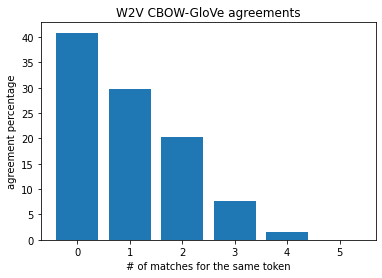

In [11]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

ag = [(a/100) for a in agreements]
plt.bar(height=ag[:6], x=['0','1', '2', '3', '4', '5'])
plt.title("W2V CBOW-GloVe agreements")
plt.xlabel("# of matches for the same token")
plt.ylabel("agreement percentage")
plt.savefig('/content/drive/MyDrive/DataSemantics/progetto/plots/cbow-glove.pdf', transparent=True)

W2V CBOW vs W2V SKIPGRAM

In [ ]:
agreements2=[]
i=0
while i<11:
    agreements2.append(0)
    i+=1

with open('agreements2.log','wt',encoding='utf-8') as f:
    i=0
    for token in m1_cbow.wv.vocab:
        a=agreement_w2v(token,m1_cbow.wv,m2_sg.wv,5)
        if i%1000==0:
            print("{}\t{}".format(i,agreements2))
        f.write("{}\t{}\n".format(token,a))
        agreements2[len(a)]+=1
        if i==10000:
          break
        i+=1
        

0	[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1000	[80, 172, 241, 276, 199, 32, 0, 0, 0, 0, 0]
2000	[159, 301, 473, 567, 425, 75, 0, 0, 0, 0, 0]
3000	[266, 457, 693, 847, 618, 119, 0, 0, 0, 0, 0]
4000	[376, 605, 907, 1141, 818, 153, 0, 0, 0, 0, 0]
5000	[483, 766, 1154, 1406, 989, 202, 0, 0, 0, 0, 0]
6000	[614, 920, 1372, 1670, 1182, 242, 0, 0, 0, 0, 0]
7000	[748, 1056, 1597, 1955, 1361, 283, 0, 0, 0, 0, 0]
8000	[885, 1252, 1794, 2213, 1544, 312, 0, 0, 0, 0, 0]
9000	[1088, 1427, 2013, 2433, 1700, 339, 0, 0, 0, 0, 0]
10000	[1306, 1634, 2217, 2652, 1828, 363, 0, 0, 0, 0, 0]


In [ ]:
print("Zero matches token percentage", (agreements2[0]/i)*100, "%")
print("One matches token percentage ", (agreements2[1]/i)*100, "%")
print("Two matches token percentage", (agreements2[2]/i)*100, "%")
print("Three matches token percentage", (agreements2[3]/i)*100, "%")
print("Four matches token percentage", (agreements2[4]/i)*100, "%")
print("Five matches token percentage", (agreements2[5]/i)*100, "%")

Coincidenza dei most similar al primo livello:  13.059999999999999 %
Coincidenza dei most similar al secondo livello:  16.34 %
Coincidenza dei most similar al terzo livello:  22.17 %
Coincidenza dei most similar al quarto livello:  26.529999999999998 %
Coincidenza dei most similar al quinto livello:  18.279999999999998 %


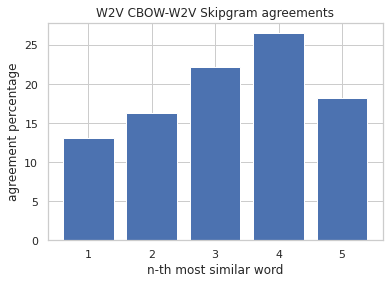

In [ ]:
ag2 = [(a/100) for a in agreements2]
plt.bar(height=ag2[:6], x=['0','1', '2', '3', '4', '5'])
plt.title("W2V CBOW-W2V Skipgram agreements")
plt.xlabel("# of matches for the same token")
plt.ylabel("agreement percentage")
plt.savefig('/content/drive/MyDrive/DataSemantics/progetto/plots/cbow-skip.pdf', transparent=True)

W2V SKIPGRAM vs GloVe

In [ ]:
agreements3=[]
i=0
while i<11:
    agreements3.append(0)
    i+=1

with open('agreements3.log','wt',encoding='utf-8') as f:
    i=0
    for token in m2_sg.wv.vocab:
        a=agreement_w2v_glove(token,m2_sg.wv,glove,5)
        if i%1000==0:
            print("{}\t{}".format(i,agreements3))
        f.write("{}\t{}\n".format(token,a))
        agreements3[len(a)]+=1
        if i==10000:
          break
        i+=1
        

0	[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1000	[292, 325, 237, 120, 26, 0, 0, 0, 0, 0, 0]
2000	[626, 663, 469, 195, 47, 0, 0, 0, 0, 0, 0]
3000	[1044, 972, 653, 272, 59, 0, 0, 0, 0, 0, 0]
4000	[1480, 1273, 839, 334, 74, 0, 0, 0, 0, 0, 0]
5000	[1945, 1565, 1002, 403, 85, 0, 0, 0, 0, 0, 0]
6000	[2436, 1845, 1157, 470, 92, 0, 0, 0, 0, 0, 0]
7000	[2942, 2126, 1314, 516, 102, 0, 0, 0, 0, 0, 0]
8000	[3496, 2389, 1448, 553, 114, 0, 0, 0, 0, 0, 0]
9000	[4103, 2635, 1550, 595, 117, 0, 0, 0, 0, 0, 0]
10000	[4748, 2858, 1644, 629, 121, 0, 0, 0, 0, 0, 0]


In [ ]:
print("Zero matches token percentage", (agreements3[0]/i)*100, "%")
print("One matches token percentage ", (agreements3[1]/i)*100, "%")
print("Two matches token percentage", (agreements3[2]/i)*100, "%")
print("Three matches token percentage", (agreements3[3]/i)*100, "%")
print("Four matches token percentage", (agreements3[4]/i)*100, "%")
print("Five matches token percentage", (agreements3[5]/i)*100, "%")

Coincidenza dei most similar al primo livello:  47.49 %
Coincidenza dei most similar al secondo livello:  28.58 %
Coincidenza dei most similar al terzo livello:  16.439999999999998 %
Coincidenza dei most similar al quarto livello:  6.29 %
Coincidenza dei most similar al quinto livello:  1.21 %


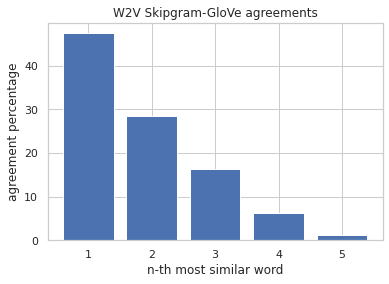

In [ ]:
ag3 = [(a/100) for a in agreements3]
plt.bar(height=ag3[:6], x=['0','1', '2', '3', '4', '5'])
plt.title("W2V Skipgram-GloVe agreements")
plt.xlabel("# of matches for the same token")
plt.ylabel("agreement percentage")
plt.savefig('/content/drive/MyDrive/DataSemantics/progetto/plots/skip-glove.pdf', transparent=True)

#POST MODELS

W2V CBOW vs GloVe 

In [ ]:
m1_cbow=gensim.models.word2vec.Word2Vec.load('/content/drive/MyDrive/DataSemantics/progetto/models/CADE/post_lem_aligned.model')
wv_cbow=m1_cbow.wv

m2_sg=gensim.models.word2vec.Word2Vec.load('/content/drive/MyDrive/DataSemantics/progetto/models/CADE/post_lem_skip_aligned.model')
wv_sg=m2_sg.wv

glove=Glove.load('/content/drive/MyDrive/DataSemantics/progetto/models/GLOVE/glove_post_lem.model')
wv_glove=glove.word_vectors

In [ ]:
agreements4=[]
i=0
while i<11:
    agreements4.append(0)
    i+=1

with open('agreements.log','wt',encoding='utf-8') as f:
    i=0
    for token in m1_cbow.wv.vocab:
        a=agreement_w2v_glove(token,m1_cbow.wv,glove,5)
        if i%1000==0:
            print("{}\t{}".format(i,agreements4))
        f.write("{}\t{}\n".format(token,a))
        agreements4[len(a)]+=1
        if i==10000:
          break
        i+=1

0	[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1000	[641, 237, 88, 26, 8, 0, 0, 0, 0, 0, 0]
2000	[1300, 478, 161, 46, 15, 0, 0, 0, 0, 0, 0]
3000	[2018, 663, 236, 60, 23, 0, 0, 0, 0, 0, 0]
4000	[2747, 850, 294, 81, 28, 0, 0, 0, 0, 0, 0]
5000	[3536, 1004, 339, 87, 34, 0, 0, 0, 0, 0, 0]
6000	[4342, 1155, 377, 91, 35, 0, 0, 0, 0, 0, 0]
7000	[5156, 1295, 412, 100, 37, 0, 0, 0, 0, 0, 0]
8000	[5960, 1446, 442, 111, 41, 0, 0, 0, 0, 0, 0]
9000	[6812, 1562, 465, 118, 43, 0, 0, 0, 0, 0, 0]
10000	[7655, 1685, 495, 121, 44, 0, 0, 0, 0, 0, 0]


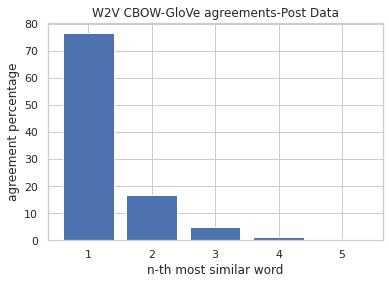

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

ag4 = [(a/100) for a in agreements4]
plt.bar(height=ag4[:6], x=['0','1', '2', '3', '4', '5'])
plt.title("W2V CBOW-GloVe agreements-Post Data")
plt.xlabel("# of mathces for the same token")
plt.ylabel("agreement percentage")
plt.savefig('/content/drive/MyDrive/DataSemantics/progetto/plots/cbow-glove-post.pdf', transparent=True)

W2V CBOW vs W2V SKIPGRAM

In [ ]:
agreements5=[]
i=0
while i<11:
    agreements5.append(0)
    i+=1
i=0
for token in m1_cbow.wv.vocab:
    a=agreement_w2v(token,m1_cbow.wv,m2_sg.wv,5)
    if i%1000==0:
        print("{}\t{}".format(i,agreements5))
    agreements5[len(a)]+=1
    if i==10000:
      break
    i+=1

0	[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1000	[225, 281, 230, 163, 75, 26, 0, 0, 0, 0, 0]
2000	[417, 569, 497, 330, 146, 41, 0, 0, 0, 0, 0]
3000	[643, 835, 748, 494, 221, 59, 0, 0, 0, 0, 0]
4000	[889, 1101, 1021, 630, 292, 67, 0, 0, 0, 0, 0]
5000	[1151, 1415, 1267, 751, 340, 76, 0, 0, 0, 0, 0]
6000	[1420, 1720, 1513, 885, 382, 80, 0, 0, 0, 0, 0]
7000	[1765, 2011, 1729, 993, 420, 82, 0, 0, 0, 0, 0]
8000	[2032, 2326, 1975, 1105, 475, 87, 0, 0, 0, 0, 0]
9000	[2395, 2653, 2167, 1189, 507, 89, 0, 0, 0, 0, 0]
10000	[2726, 2961, 2383, 1295, 545, 90, 0, 0, 0, 0, 0]


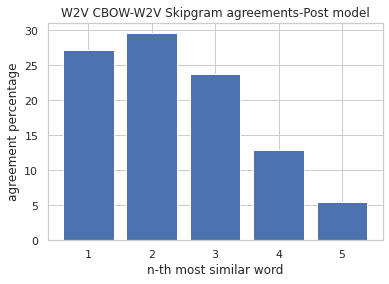

In [ ]:
ag5 = [(a/100) for a in agreements5]
plt.bar(height=ag5[:6], x=['0','1', '2', '3', '4', '5'])
plt.title("W2V CBOW-W2V Skipgram agreements-Post model")
plt.xlabel("# of matches for the same token")
plt.ylabel("agreement percentage")
plt.savefig('/content/drive/MyDrive/DataSemantics/progetto/plots/cbow-skip-post.pdf', transparent=True)

W2V SKIPGRAM vs GloVe

In [ ]:
agreements6=[]
i=0
while i<11:
    agreements6.append(0)
    i+=1

i=0
for token in m2_sg.wv.vocab:
  a=agreement_w2v_glove(token,m2_sg.wv,glove,5)
  if i%1000==0:
    print("{}\t{}".format(i,agreements6))
  agreements6[len(a)]+=1
  if i==10000:
    break
  i+=1

0	[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1000	[708, 191, 67, 27, 7, 0, 0, 0, 0, 0, 0]
2000	[1429, 393, 115, 50, 13, 0, 0, 0, 0, 0, 0]
3000	[2228, 533, 155, 61, 23, 0, 0, 0, 0, 0, 0]
4000	[3034, 667, 194, 79, 26, 0, 0, 0, 0, 0, 0]
5000	[3873, 786, 226, 87, 28, 0, 0, 0, 0, 0, 0]
6000	[4751, 881, 246, 93, 29, 0, 0, 0, 0, 0, 0]
7000	[5639, 961, 270, 99, 31, 0, 0, 0, 0, 0, 0]
8000	[6511, 1064, 288, 101, 36, 0, 0, 0, 0, 0, 0]
9000	[7417, 1136, 305, 106, 36, 0, 0, 0, 0, 0, 0]
10000	[8317, 1216, 321, 108, 38, 0, 0, 0, 0, 0, 0]


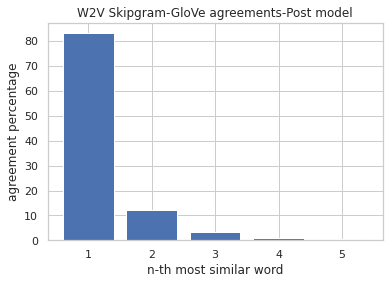

In [ ]:
ag6 = [(a/100) for a in agreements6]
plt.bar(height=ag6[:6], x=['0','1', '2', '3', '4', '5'])
plt.title("W2V Skipgram-GloVe agreements-Post model")
plt.xlabel("# of mathes for the same token")
plt.ylabel("agreement percentage")
plt.savefig('/content/drive/MyDrive/DataSemantics/progetto/plots/skip-glove-post.pdf', transparent=True)